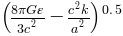

In [15]:
# 1
import numpy as np
import sympy as sp
from astropy import units as u
from astropy import constants as const
sp.init_printing() # pretty printing 

Eps = sp.symbols('\u03B5')
Eps_dot = sp.symbols('d\u03B5/dt')
a = sp.symbols('a')
a_dot = sp.symbols('da/dt')
k = sp.symbols('k')
c = sp.symbols('c')
G = sp.symbols('G')
P = sp.symbols('P')
#use the friedmann equation, combine with the fluid equation, to get the 3rd eqn, acceleration equation. 
FE = ((8 * sp.pi * G * Eps)/(3*c**2) - (k*c**2)/a**2)**(1/2)
FE

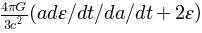

In [13]:
# FE = H**2  = (a_dot/a)**2
# mutliply both sides by a**2 and take time derivative
# 2 * a_dot * a_dbl_dot = (8piG/3c**2)*(Eps_dot*a**2 + 2*Eps*a*a_dot); 
# present in a_dbl_dot/a; A = a_dbl_dot / a

A = ((4 * sp.pi * G)/(3*c**2)) * (Eps_dot * a/a_dot + 2*Eps)
A

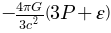

In [16]:
# use fluid eqn to substitute in for Eps_dot * a/a_dot 
# Eps_dot * a/a_dot = -3(Eps + P)
# gives new A, giving acceleration equation:
A_new = -((4 * sp.pi * G)/(3*c**2))*(Eps + 3*P)
A_new


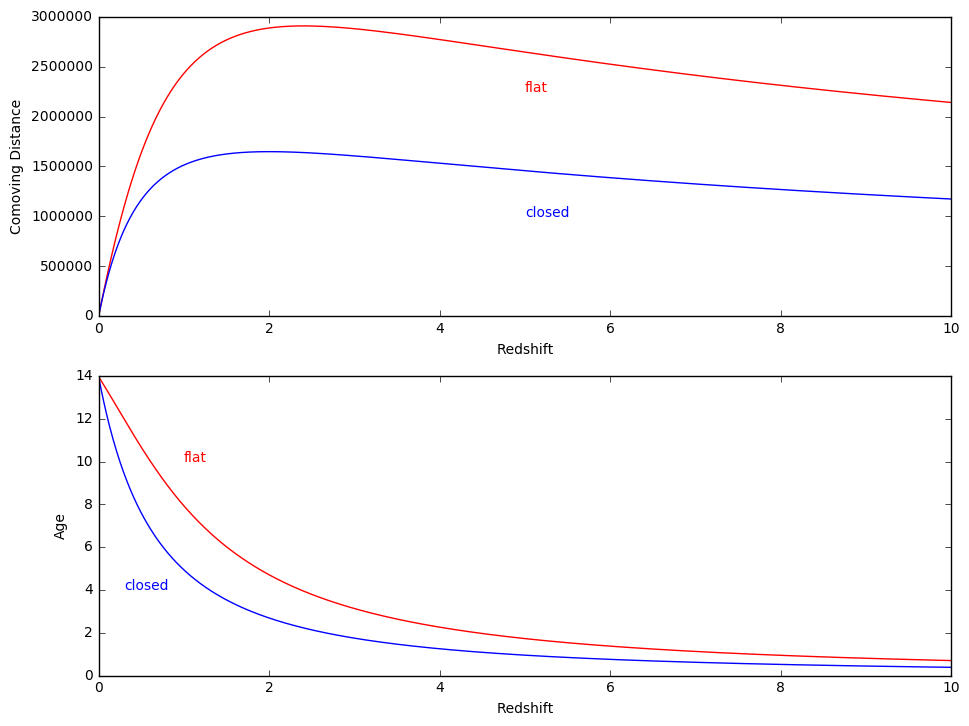

In [53]:
# 2
import matplotlib.pyplot as plt
%matplotlib inline 
x = sp.symbols('x')
Mpc = u.def_unit('Mpc', u.pc * 10**6)
Gyr = u.def_unit('Gyr', u.yr*10**9)
h0 = 70 * u.km /(u.s * u.Mpc)
#define universes:
# flat
Om_m_0 = 0.3
Om_r_0 = 0
Om_l_0 = 0.7
Om_0 = Om_r_0 + Om_m_0 + Om_l_0

def H(z):
    H = h0*(Om_r_0*(1+z)**4 + Om_m_0*(1+z)**3 + Om_l_0 + (1-Om_0)*(1+z)**3)**(1/2)
    return H

def comov(H,z):
    dr = const.c/H
    dr = dr.value
    r = sp.integrate(dr,(x,0,z))
    return r
# flat, comoving
z = np.linspace(0,10,1000)
r_flat = np.array([])
age_flat = np.array([])

for i in z:
    Ht = H(i)
    com = comov(Ht,i)
    age = 1/(Ht.to(1/u.s))
    age = age.to(u.Gyr)
    r_flat = np.append(r_flat,com)
    age_flat = np.append(age_flat,age)

fig,ax = plt.subplots(2,1)
fig.set_size_inches(11,8.5)
ax[0].plot(z,r_flat,color='r')
ax[1].plot(z,age_flat,color='r')
# flat, age
# now for closed

Om_m_0 = 1
Om_r_0 = 0
Om_l_0 = 0
Om_0 = Om_r_0 + Om_m_0 + Om_l_0

r_closed = np.array([])
age_closed = np.array([])
for i in z:
    Ht = H(i)
    com = comov(Ht,i)
    age = 1/(Ht.to(1/u.s))
    age = age.to(u.Gyr)         
    r_closed = np.append(r_closed,com)
    age_closed = np.append(age_closed,age)

ax[0].plot(z,r_closed,color='b')
ax[1].plot(z,age_closed,color='b')
ax[0].set_xlabel('Redshift')
ax[1].set_xlabel('Redshift')
ax[0].text(5,2250000,'flat',color='r')
ax[0].text(5,1000000,'closed',color='b')
ax[0].set_ylabel('Comoving Distance')
ax[1].text(1,10,'flat',color='r')
ax[1].text(0.3,4,'closed',color='b')
ax[1].set_ylabel('Age')



/home/dm1681/anaconda3/lib/python3.5/site-packages/astropy/units/quantity.py:858: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


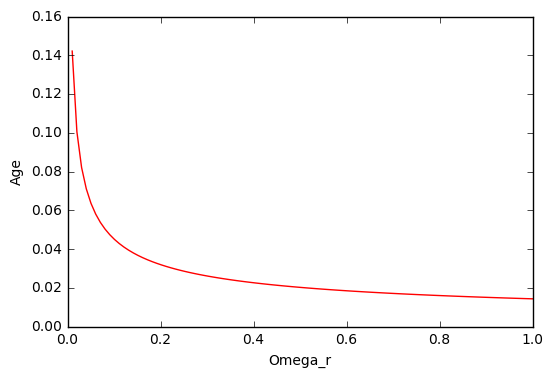

In [128]:
# 3
# copy above code
import matplotlib.pyplot as plt
%matplotlib inline 
x = sp.symbols('x')
Mpc = u.def_unit('Mpc', u.pc * 10**6)
Gyr = u.def_unit('Gyr', u.yr*10**9)
h0 = 70 * u.km /(u.s * u.Mpc)
#define universe


def H(Om_r_0):
    H = h0*(Om_r_0*(1)**4)**(1/2)
    return H

z = 0 #today
Om_r_0 = np.linspace(0,1,100)
age_list = np.array([])
for i in Om_r_0:
    Ht = H(i)
    age = 1 / Ht
    age_list = np.append(age_list,age)
    


    
fig,ax = plt.subplots(1,1)
ax.plot(Om_r_0,age_list,color='r')
ax.set_ylabel('Age')
ax.set_xlabel('Omega_r')
# Omega_R < 0.1 for 14Gyrs? 